# SEMMA

## Step 1: Sample

In this stage, we'll load the dataset and take a quick look at its structure.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving graduation_dataset.csv to graduation_dataset.csv


In [2]:
import pandas as pd
import io

# Load the dataset
dataset = pd.read_csv(io.BytesIO(uploaded['graduation_dataset.csv']))

# Display the first few rows of the dataset and its shape
dataset_head = dataset.head()
dataset_shape = dataset.shape

dataset_head, dataset_shape


(   Marital status  Application mode  Application order  Course  \
 0               1                 8                  5       2   
 1               1                 6                  1      11   
 2               1                 1                  5       5   
 3               1                 8                  2      15   
 4               2                12                  1       3   
 
    Daytime/evening attendance  Previous qualification  Nacionality  \
 0                           1                       1            1   
 1                           1                       1            1   
 2                           1                       1            1   
 3                           1                       1            1   
 4                           0                       1            1   
 
    Mother's qualification  Father's qualification  Mother's occupation  ...  \
 0                      13                      10                    6  ...   
 1      

## Step 2: Explore

Getting the summary statistics of the dataset and understanding the distribution of the target variable.

In [3]:
# Summary statistics of the dataset
summary_statistics = dataset.describe()

# Distribution of the target variable
target_distribution = dataset['Target'].value_counts()

summary_statistics, target_distribution


(       Marital status  Application mode  Application order       Course  \
 count     4424.000000       4424.000000        4424.000000  4424.000000   
 mean         1.178571          6.886980           1.727848     9.899186   
 std          0.605747          5.298964           1.313793     4.331792   
 min          1.000000          1.000000           0.000000     1.000000   
 25%          1.000000          1.000000           1.000000     6.000000   
 50%          1.000000          8.000000           1.000000    10.000000   
 75%          1.000000         12.000000           2.000000    13.000000   
 max          6.000000         18.000000           9.000000    17.000000   
 
        Daytime/evening attendance  Previous qualification  Nacionality  \
 count                 4424.000000             4424.000000  4424.000000   
 mean                     0.890823                2.531420     1.254521   
 std                      0.311897                3.963707     1.748447   
 min          

Exploration Result:
The dataset has various features, and their summary statistics give an idea of the central tendency and spread of each feature. For example, the mean marital status is approximately 1.18 with a standard deviation of 0.61, indicating that most of the observations in this feature are close to the mean.

Distribution of the Target Variable:

Graduate: 2,209
Dropout: 1,421
Enrolled: 794

**Visualization**

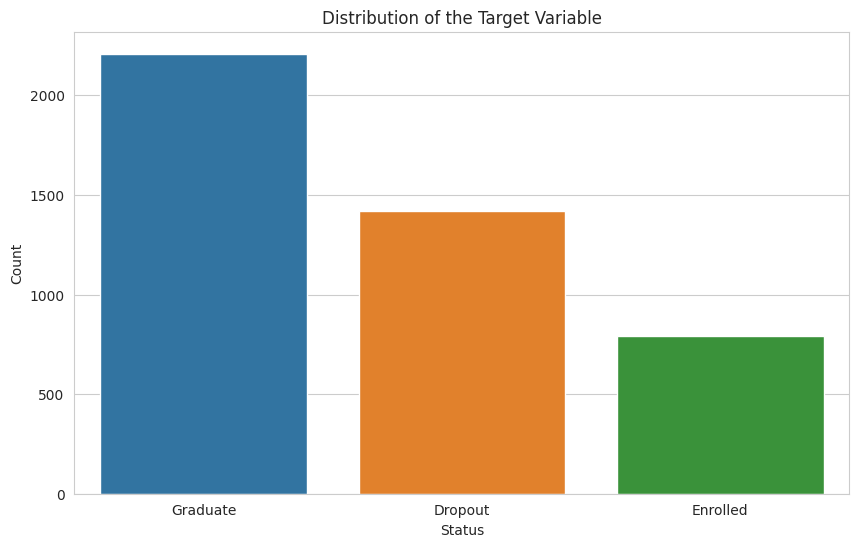

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Target', order=dataset['Target'].value_counts().index)
plt.title("Distribution of the Target Variable")
plt.ylabel("Count")
plt.xlabel("Status")
plt.show()


 Next, create a correlation heatmap to understand the relationships between the numerical variables. This will help us identify potential multicollinearity and understand which variables are more correlated with each other.

<ipython-input-5-f2d6296f16c4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


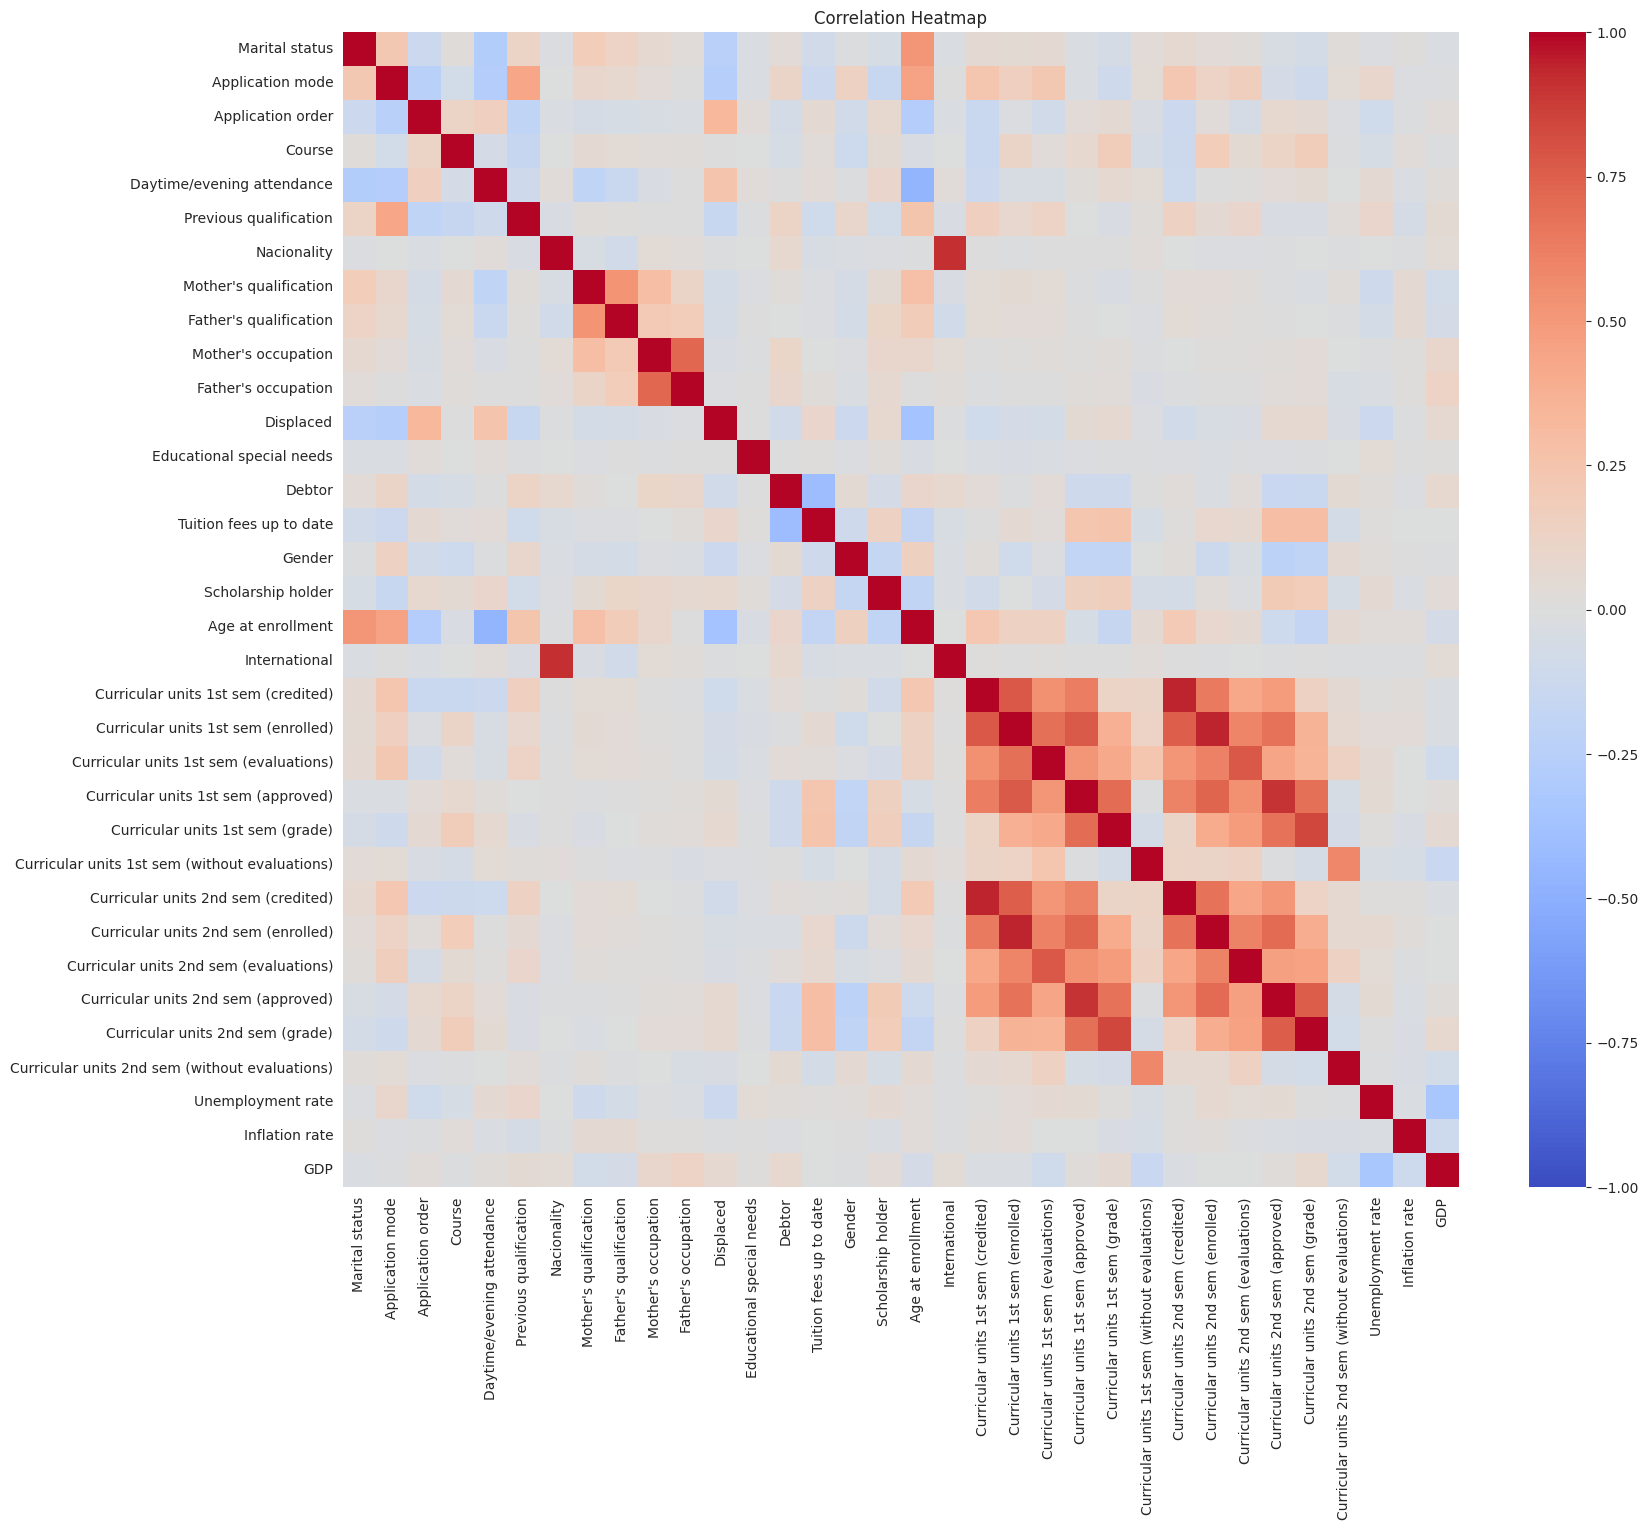

In [5]:
# Correlation heatmap of the numerical variables
plt.figure(figsize=(18, 15))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In the above mentioned heatmap:

Dark blue cells indicate strong positive correlations.
Dark red cells indicate strong negative correlations.
Light-colored cells represent weak or no correlations.

## Step 3: Modify

In the modification stage, we will:
* Handle any missing values.
* Encode categorical variables, if any.
* Split the dataset into training and testing sets.





In [6]:
# Check for missing values
missing_values = dataset.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

Split the dataset into training and testing sets.

In [7]:
# Identify potential categorical columns based on unique value counts
categorical_columns = dataset.nunique()[dataset.nunique() < 20].index.tolist()

# Exclude the target column from the list of categorical columns
categorical_columns.remove("Target")
categorical_columns


['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

Now, we will use one-hot encoding whic is a common technique to convert categorical variables into a format that ML algorithms use.

In [8]:
# One-hot encode the categorical columns
dataset_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
dataset_encoded.head()


,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),...,Inflation rate_3.7,GDP_-3.12,GDP_-1.7,GDP_-0.92,GDP_0.32,GDP_0.79,GDP_1.74,GDP_1.79,GDP_2.02,GDP_3.51
0,1,13,10,6,10,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,3,4,4,19,0,6,6,6,...,0,0,0,0,0,1,0,0,0,0
2,1,22,27,10,10,19,0,6,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,23,27,6,4,20,0,6,8,6,...,0,1,0,0,0,0,0,0,0,0
4,1,22,28,10,10,45,0,6,9,5,...,0,0,0,0,0,1,0,0,0,0


**Data Splitting**

We will use 70% of the data for training and 30% for testing.

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = dataset_encoded.drop("Target", axis=1)
y = dataset_encoded["Target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape


((3096, 147), (1328, 147))

The dataset has been split into:

Training set: 3,096 observations |
Testing set: 1,328 observations |
Each set has 147 features after one-hot encoding.

## Step 4: Model

In the modeling stage, we'll:
Choose a suitable algorithm, train the model on the training set, predict the target variable on the testing set.

In [10]:
#Train Rainforest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_pred[:10]  # Display the first 10 predictions


array(['Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate'],
      dtype=object)

## Step 5: Assess

In the assessment stage, we'll evaluate the performance of the model using appropriate evaluation metrics. Given that this is a multi-class classification problem, we can use:
*   Confusion Matrix
*   Classification Report



In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Graduate', 'Dropout', 'Enrolled'])

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Graduate', 'Dropout', 'Enrolled'])
conf_matrix, class_report


(array([[596,  21,  25],
        [ 75, 340,  26],
        [106,  64,  75]]),
 '              precision    recall  f1-score   support\n\n    Graduate       0.80      0.77      0.79       441\n     Dropout       0.60      0.31      0.40       245\n    Enrolled       0.77      0.93      0.84       642\n\n    accuracy                           0.76      1328\n   macro avg       0.72      0.67      0.68      1328\nweighted avg       0.75      0.76      0.74      1328\n')